--- Starting EDA for ../data/e_commerce_electronic_sales_2025_dataset.csv ---

[INFO] Dataset Overview:
<class 'pandas.DataFrame'>
RangeIndex: 108300 entries, 0 to 108299
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        108300 non-null  str           
 1   date            108300 non-null  datetime64[us]
 2   customer_id     108300 non-null  str           
 3   customer_name   108300 non-null  str           
 4   customer_email  108300 non-null  str           
 5   country         108300 non-null  str           
 6   product         108300 non-null  str           
 7   price           108300 non-null  float64       
 8   quantity        108300 non-null  int64         
 9   order_value     108300 non-null  float64       
 10  month           108300 non-null  int32         
 11  month_name      108300 non-null  str           
dtypes: datetime64[us](1), float64(2), int32(1), int64

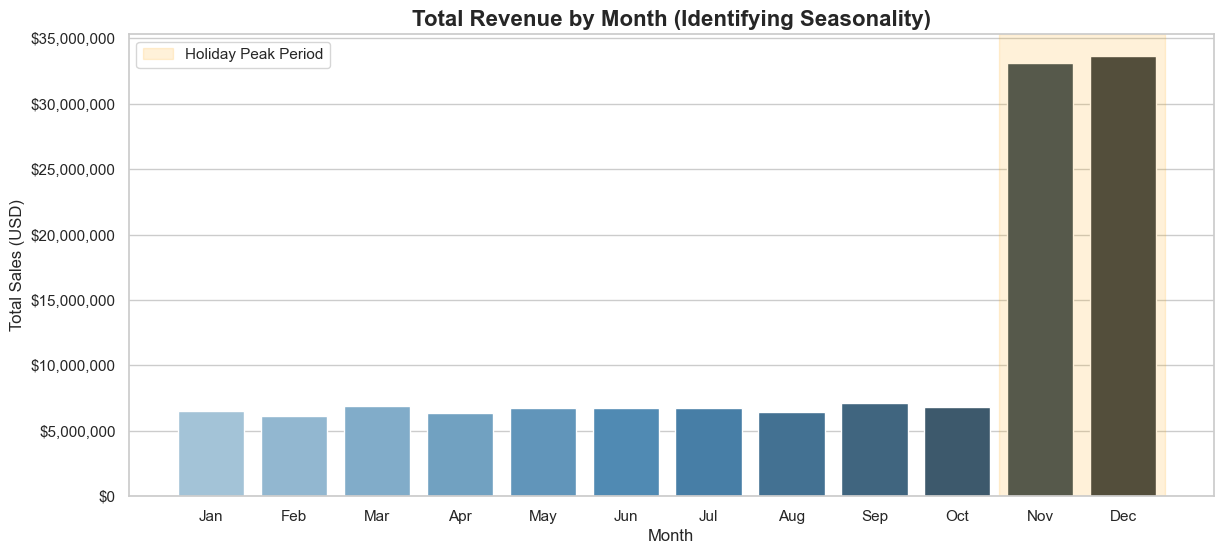


[PLOT] Generating Regional Analysis...


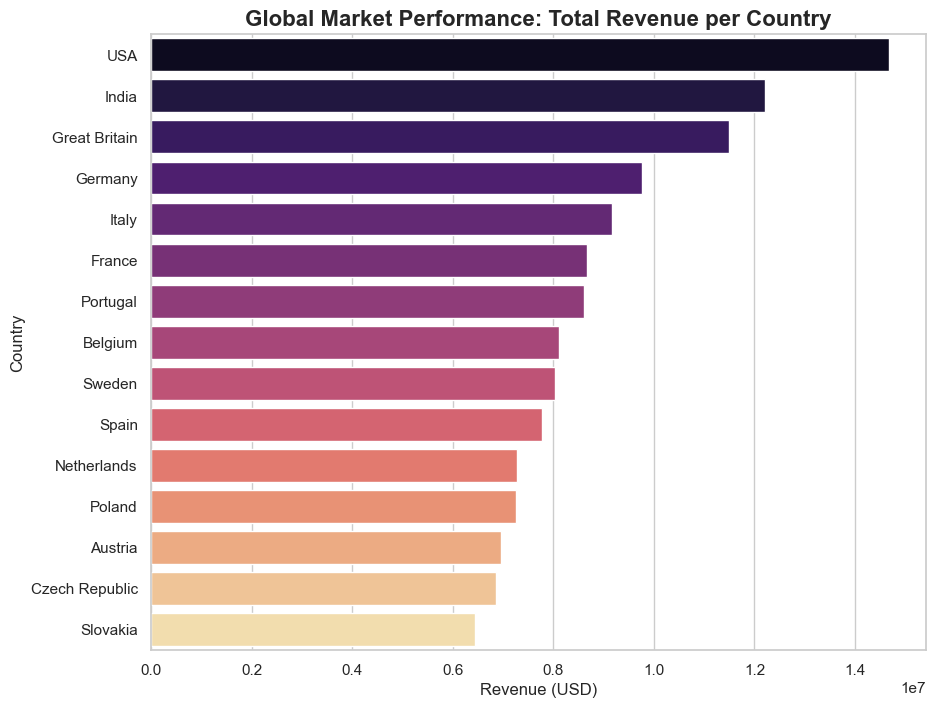


[INFO] Top 10 Best-Selling Products (by Revenue):
product
Foldable Phone          9194689.00
Desktop PC Gamer        7803282.00
Laptop Pro 15           6559749.54
Mirrorless Camera       6223200.00
MacBook Air M2          5975816.00
4K Projector            5516500.00
Smartphone flagship     4910085.00
Home Theater System     4870782.00
DSLR Camera             4351150.00
OLED Monitor 27-inch    4188117.00
Name: order_value, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def load_and_preprocess(file_path: str) -> pd.DataFrame:
    """
    Loads the e-commerce dataset and prepares date-related features.

    Args:
        file_path: Path to the CSV file.

    Returns:
        Processed pandas DataFrame.
    """
    df: pd.DataFrame = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.strftime('%b')
    return df

def plot_seasonality(df: pd.DataFrame) -> None:
    """
    Visualizes the monthly revenue to highlight the Q4 seasonal spikes.

    Args:
        df: The processed DataFrame.
    """
    
    monthly_sales: pd.DataFrame = df.groupby(['month', 'month_name'])['order_value'].sum().reset_index()
    
    plt.figure(figsize=(14, 6))
    
    ax = sns.barplot(
        data=monthly_sales, 
        x='month_name', 
        y='order_value', 
        hue='month_name',
        palette='Blues_d', 
        legend=False 
    )
    
    plt.title('Total Revenue by Month (Identifying Seasonality)', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales (USD)', fontsize=12)
    
    plt.axvspan(9.5, 11.5, color='orange', alpha=0.15, label='Holiday Peak Period')
    
    from matplotlib.ticker import StrMethodFormatter
    ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
    
    plt.legend()
    plt.show()

def plot_regional_performance(df: pd.DataFrame) -> None:
    """
    Ranks countries by their total order value.

    Args:
        df: The processed DataFrame.
    """
    country_revenue: pd.DataFrame = df.groupby('country')['order_value'].sum().sort_values(ascending=False).reset_index()
    
    plt.figure(figsize=(10, 8))
    
    sns.barplot(
        data=country_revenue, 
        x='order_value', 
        y='country', 
        hue='country',
        palette='magma', 
        legend=False
    )
    
    plt.title('Global Market Performance: Total Revenue per Country', fontsize=16, fontweight='bold')
    plt.xlabel('Revenue (USD)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.show()

def main_eda(file_name: str) -> None:
    """
    Executes a comprehensive EDA suite on the dataset.
    """
    print(f"--- Starting EDA for {file_name} ---")
    df: pd.DataFrame = load_and_preprocess(file_name)
    
    print("\n[INFO] Dataset Overview:")
    print(df.info())
    
    print("\n[INFO] Missing Values:")
    print(df.isnull().sum())
    
    print("\n[PLOT] Generating Seasonal Trends...")
    plot_seasonality(df)
    
    print("\n[PLOT] Generating Regional Analysis...")
    plot_regional_performance(df)
    
    print("\n[INFO] Top 10 Best-Selling Products (by Revenue):")
    top_prods = df.groupby('product')['order_value'].sum().sort_values(ascending=False).head(10)
    print(top_prods)


if __name__ == "__main__":
    DATA_PATH = "../data/e_commerce_electronic_sales_2025_dataset.csv"
    main_eda(DATA_PATH)